In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
import pandas as pd
import numpy as np
from datetime import datetime
import time

In [2]:
df = pd.read_csv('all_cf4_sni1_sample.csv', delimiter='|')
df = df.rename(columns=lambda x: x.strip())
df = df.set_index('PGC')
df = df.drop(columns=['1PGC'])
print(len(df))
df.head()

1009


,SNIa,IDT17g,Vcmb,Vmod,DM_av,eDM,DM_pantheonplus,eDM_pantheonplus,DM_scolnic,eDM_scolnic,...,DM_twins,eDM_twins,DM_avelino,eDM_avelino,RA,DE,glon,glat,sgl,sgb
PGC,,,,,,,,,,,,,,,,,,,,,
250,2006sr,0,6914,7042,35.04,0.13,35.07,0.25,35.03,0.20,...,NaN,NaN,NaN,NaN,0.8958,23.2008,108.8693,-38.3606,316.3211,17.6720
282,2008hj,0,10921,11235,36.03,0.11,35.98,0.24,36.00,0.18,...,NaN,NaN,35.97,0.12,1.0064,-11.1742,85.7160,-70.5385,282.0792,8.9703
415,2003it,0,7165,7301,35.12,0.14,35.14,0.25,35.12,0.21,...,NaN,NaN,NaN,NaN,1.4517,27.4491,110.6597,-34.3329,320.8087,17.8681
465,2000dg,0,11092,11415,36.05,0.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5588,8.8878,104.4513,-52.3545,301.9054,14.0485
515,2002hw,0,4796,4857,34.28,0.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.7062,8.6285,104.5597,-52.6445,301.6830,13.8439


In [3]:
df0 = pd.read_csv('./all_cf4_sni1_sample.csv', delimiter='|')
df0 = df0.rename(columns=lambda x: x.strip())
df0 = df0.set_index('PGC')
df0 = df0[['1PGC']]
print(len(df0))
df0.head()

1009


,1PGC
PGC,
250,250
282,282
415,415
465,616
515,515


In [4]:
df = df0.join(df, how='inner')
print(len(df))

df.head()



1009


,1PGC,SNIa,IDT17g,Vcmb,Vmod,DM_av,eDM,DM_pantheonplus,eDM_pantheonplus,DM_scolnic,...,DM_twins,eDM_twins,DM_avelino,eDM_avelino,RA,DE,glon,glat,sgl,sgb
PGC,,,,,,,,,,,,,,,,,,,,,
250,250,2006sr,0,6914,7042,35.04,0.13,35.07,0.25,35.03,...,NaN,NaN,NaN,NaN,0.8958,23.2008,108.8693,-38.3606,316.3211,17.6720
282,282,2008hj,0,10921,11235,36.03,0.11,35.98,0.24,36.00,...,NaN,NaN,35.97,0.12,1.0064,-11.1742,85.7160,-70.5385,282.0792,8.9703
415,415,2003it,0,7165,7301,35.12,0.14,35.14,0.25,35.12,...,NaN,NaN,NaN,NaN,1.4517,27.4491,110.6597,-34.3329,320.8087,17.8681
465,616,2000dg,0,11092,11415,36.05,0.20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5588,8.8878,104.4513,-52.3545,301.9054,14.0485
515,515,2002hw,0,4796,4857,34.28,0.15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.7062,8.6285,104.5597,-52.6445,301.6830,13.8439


In [5]:
catalogs = []
catalogs = ["sh0es"]
catalogs += ["pantheonplus"]
catalogs += ["scolnic"]
catalogs += ["csp1"]
catalogs += ["ganesh"]
catalogs += ["rest"]
catalogs += ["amanullah"]
catalogs += ["jha"]
catalogs += ["prieto"]
catalogs += ["hicken"]
catalogs += ["folatelli"]
catalogs += ["walker"]
catalogs += ["stahl"]
catalogs += ["twins"]
catalogs += ["avelino"]

In [6]:
for cat in catalogs:
    df["eDM_"+cat][df["DM_"+cat]==0] = np.nan
    df["DM_"+cat][df["DM_"+cat]==0] = np.nan
    df['PGC1_'+cat] = df.index
    df['PGC1_'+cat][df["DM_"+cat].isna()] = np.nan
    df['Vcmb_'+cat] = df["Vcmb"]
    df['Vcmb_'+cat][df["DM_"+cat].isna()] = np.nan
df.head()

<ipython-input-6-4b160e5ccce7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eDM_"+cat][df["DM_"+cat]==0] = np.nan
<ipython-input-6-4b160e5ccce7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DM_"+cat][df["DM_"+cat]==0] = np.nan
<ipython-input-6-4b160e5ccce7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PGC1_'+cat][df["DM_"+cat].isna()] = np.nan
<ipython-input-6-4b160e5ccce7>:7: SettingWithCopyWarning: 
A value is

,1PGC,SNIa,IDT17g,Vcmb,Vmod,DM_av,eDM,DM_pantheonplus,eDM_pantheonplus,DM_scolnic,...,PGC1_folatelli,Vcmb_folatelli,PGC1_walker,Vcmb_walker,PGC1_stahl,Vcmb_stahl,PGC1_twins,Vcmb_twins,PGC1_avelino,Vcmb_avelino
PGC,,,,,,,,,,,,,,,,,,,,,
250,250,2006sr,0,6914,7042,35.04,0.13,35.07,0.25,35.03,...,NaN,NaN,NaN,NaN,250.0,6914.0,NaN,NaN,NaN,NaN
282,282,2008hj,0,10921,11235,36.03,0.11,35.98,0.24,36.00,...,NaN,NaN,NaN,NaN,282.0,10921.0,NaN,NaN,282.0,10921.0
415,415,2003it,0,7165,7301,35.12,0.14,35.14,0.25,35.12,...,NaN,NaN,NaN,NaN,415.0,7165.0,NaN,NaN,NaN,NaN
465,616,2000dg,0,11092,11415,36.05,0.20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,465.0,11092.0,NaN,NaN,NaN,NaN
515,515,2002hw,0,4796,4857,34.28,0.15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,515.0,4796.0,NaN,NaN,NaN,NaN


In [7]:
npzName = "SNIa_groups.npz"
npzfile = np.load(npzName)
print("npz attributes: ", npzfile.files)
NPZsamples = npzfile['arr_0']

npz attributes:  ['arr_0']


In [8]:
mean = np.mean(NPZsamples[:,0])

mean

-0.0002178921048652701

In [9]:
NPZsamples[:,0] -= mean

In [10]:
NPZsamples.shape

(512000, 15)

In [11]:
catalogs = []
catalogs = ["sh0es"] # 0
catalogs += ["pantheonplus"] # 1
catalogs += ["scolnic"] # 2
catalogs += ["stahl"] #  3 
catalogs += ["twins"] # 4
catalogs += ["csp1"] # 5
catalogs += ["ganesh"] # 6
catalogs += ["rest"] # 7
catalogs += ["amanullah"] # 8
catalogs += ["jha"] # 9 
catalogs += ["prieto"] # 10
catalogs += ["hicken"] # 11
catalogs += ["folatelli"] # 12
catalogs += ["walker"] # 13
catalogs += ["avelino"] # 14

In [12]:
import copy 

NPZsamples_ = copy.deepcopy(NPZsamples)

NPZsamples_[:, 5:14] = NPZsamples[:, 3:12]
NPZsamples_[:, 3:5] = NPZsamples[:, 12:14]


NPZsamples = copy.deepcopy(NPZsamples_)

<ipython-input-13-8e3172fcbc85>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sumDM"][df["sumDM"]==0] = np.nan


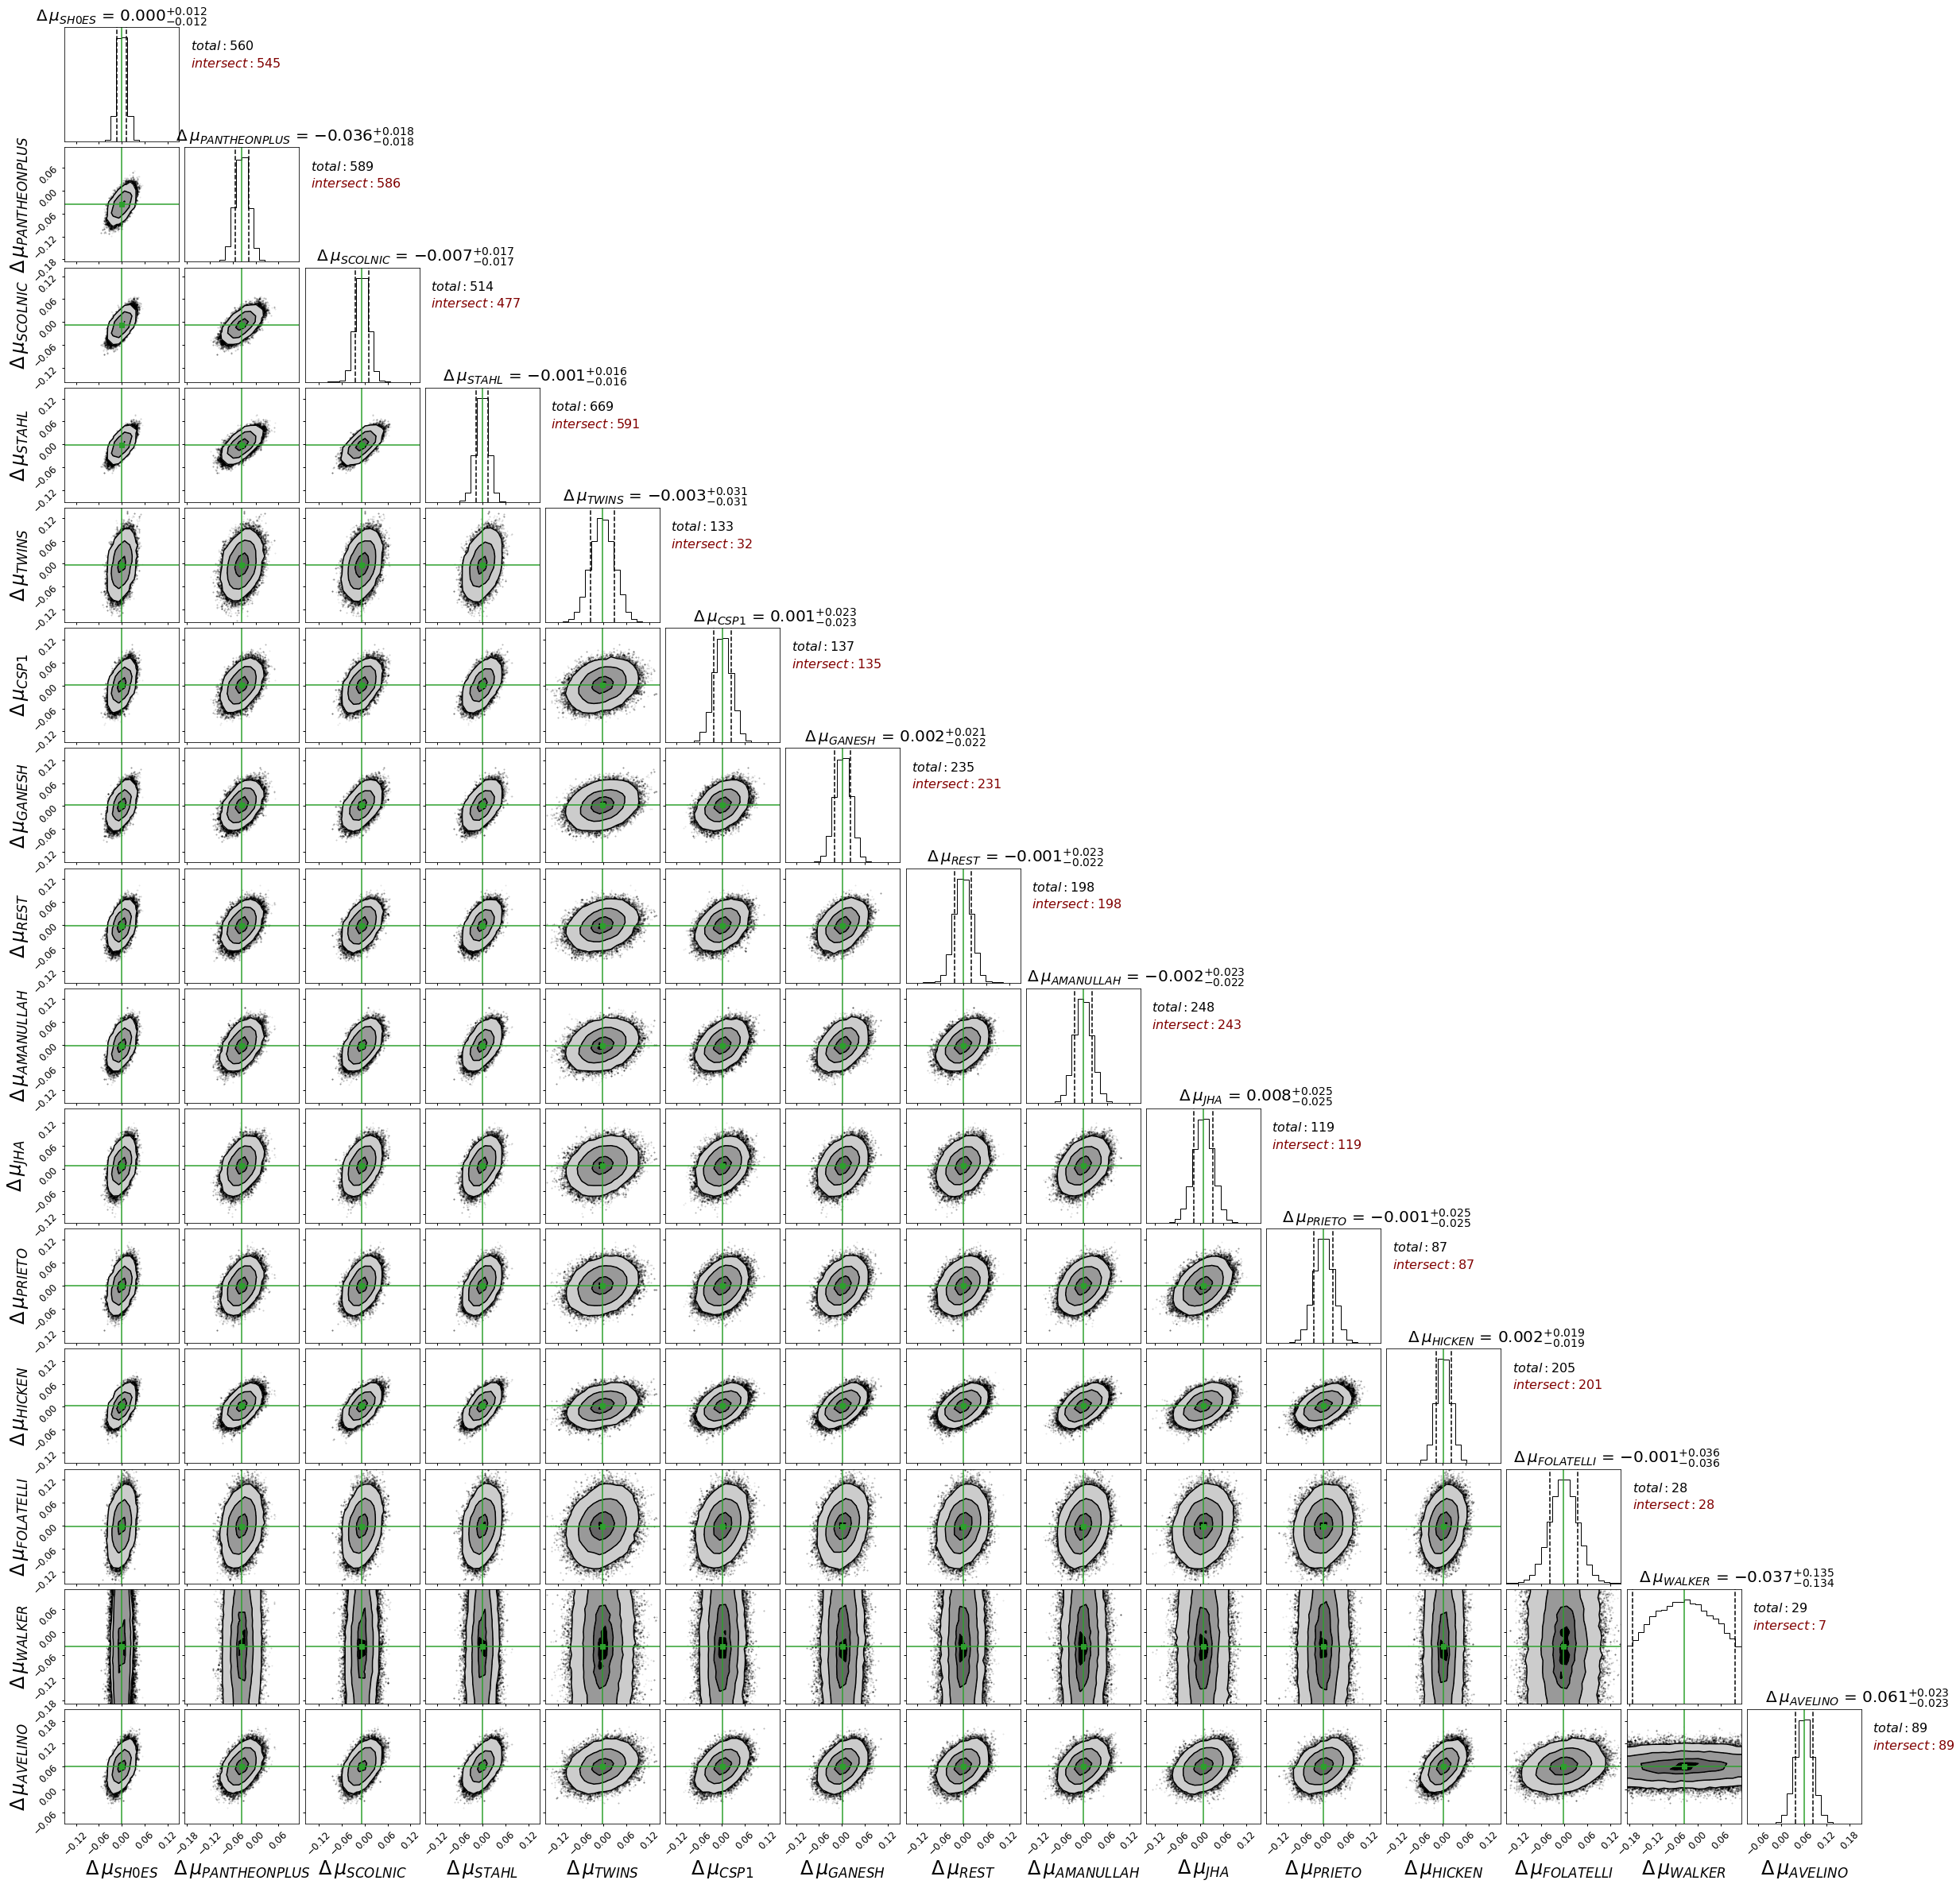

In [13]:
theta = map(lambda v: [v[1], v[2]-v[1], v[1]-v[0]],
                            zip(*np.percentile(NPZsamples, 
                            [16, 50, 84],
                            axis=0)))

truths=[t[0] for t in theta]
truths[0] = 0

labels = ['                     '+r'$\Delta\/ \mu_{'+cat.upper()+'}$' for cat in catalogs] # catalogs[1:]]

fig = corner.corner(NPZsamples, labels=labels, 
                    truths=truths, truth_color='#2ca02c',
                    levels=(1-np.exp(-1./8),1-np.exp(-0.5),1-np.exp(-0.5*4),1-np.exp(-0.5*9)),
                    show_titles=True, fill_contours=True, plot_density=True,
                    quantiles=[0.16, 0.84], 
                    scale_hist=False,space=0, 
                    title_kwargs={"fontsize": 20}, 
                    title_fmt=".3f",
                    range=[(t-0.15,t+0.15) for t in truths]
                   )

m = 0 
n_cat = len(catalogs)
i_cat = 0
for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=12)
    
    lbl = ax.xaxis.get_label()
    lbl.set_fontsize(24)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)
    lbl.set_linespacing(50)
    lbl = ax.yaxis.get_label()
    lbl.set_fontsize(24)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)    

    ### forcing the the title of the upper left corner panel to be zero
    title = ax.get_title().strip()
    if m==0:
        tl = title.split("=")
        left = tl[0]
        right = tl[1]
        nl = right.split("_")
        number = nl[0]
        error  = nl[1]
        title = left+'='+' ${0.000}_'+error
        ax.set_title(title)
        ax.title.set_fontsize(20)
    
    
    ax.tick_params(which='major', length=3, width=1., direction='out')
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = -0.1*Xlm[0]+1.1*Xlm[1]
    
    if m%(n_cat+1)==0:
        y0 = 0.2*Ylm[0]+0.80*Ylm[1]
        dx = df[['DM_'+catalogs[i_cat]]].dropna()
        ax.text(x0,y0, r"$total: $"+str(len(dx)), fontsize=16, color='k')
        
        y0 = 0.35*Ylm[0]+0.65*Ylm[1]
        other_DMs = ["DM_"+c for c in catalogs if c != catalogs[i_cat]]
        
        df["sumDM"] = df[other_DMs].sum(axis=1)
        df["sumDM"][df["sumDM"]==0] = np.nan
        
        dx = df[['sumDM', 'DM_'+catalogs[i_cat]]].dropna()       
        ax.text(x0,y0, r"$intersect: $"+str(len(dx)), fontsize=16, color='maroon')
        i_cat += 1


    m+=1

